## Load libraries

In [1]:
# Libraries to work cross-platform
import os

# Libraries to work with dataset
import numpy as np
import pandas as pd
import ast                      # convert string to list after importing csv data
import dask.dataframe as dd

# Libraries to pre-process data
import spacy
from gensim.models.keyedvectors import KeyedVectors

# Libraries to visualize data
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for monitoring operation process
from tqdm import tqdm

## Configurate and declare global variables

In [2]:
os_name = os.name

if os_name == 'nt':
    BASE_DIR = "E:/THIENDHB_GOOGLEDRIVE/MASTER TILBURG/THESIS/"
    INPUT_DIR = BASE_DIR + "DATASET/INPUT/"
    OUTPUT_DIR = BASE_DIR + "DATASET/OUTPUT/"
elif os_name == 'posix':
    BASE_DIR = "/media/pinkalinux/WORK/THIENDHB_GOOGLEDRIVE/MASTER TILBURG/THESIS/"
    INPUT_DIR = BASE_DIR + "DATASET/INPUT/"
    OUTPUT_DIR = BASE_DIR + "DATASET/OUTPUT/"

SEED = 6886

%matplotlib inline

## Import data

In [3]:
# skill_tokens_df_raw = pd.read_csv(OUTPUT_DIR + "skill_tokens_df.csv")
# skill_tokens_df_raw.columns

In [4]:
# convert_columns = skill_tokens_df_raw.columns[1:]
# convert_columns

In [5]:
# skill_tokens_df = skill_tokens_df_raw[convert_columns].applymap(ast.literal_eval)

In [6]:
# skill_tokens_df.insert(0, 'job_id', skill_tokens_df_raw['job_id'])

In [7]:
# skill_tokens_df

In [8]:
# skill_tokens_df_raw = None

In [9]:
# clean_skill_df_raw = pd.read_csv(OUTPUT_DIR + "clean_skill_df.csv")
# clean_skill_df = clean_skill_df_raw[clean_skill_df_raw.columns[1:]].applymap(
#     ast.literal_eval
# )

In [10]:
# clean_skill_df.insert(0, 'job_id', clean_skill_df_raw['job_id'])
# clean_skill_df

In [11]:
# clean_skill_df_raw = None

In [12]:
# skill_tokens_db_raw = pd.read_csv(OUTPUT_DIR + "clean_skill_db.csv")
# skill_tokens_db_raw

In [13]:
# # convert_columns = set(skill_tokens_db_raw.columns) - set(['skill_id', 'job_id', 'type'])
# skill_tokens_db = skill_tokens_db_raw[['skill_tokens']].applymap(
#     ast.literal_eval
# )
# skill_tokens_db['type'] = skill_tokens_db_raw['type']
# skill_tokens_db.insert(0, 'skills', skill_tokens_db_raw['skills'])
# skill_tokens_db.insert(0, 'job_id', skill_tokens_db_raw['job_id'])
# skill_tokens_db.insert(0, 'skill_id', skill_tokens_db_raw['skill_id'])
# skill_tokens_db

In [14]:
# skill_tokens_db_raw = None

In [15]:
skill_tokens_long_df = pd.read_csv(OUTPUT_DIR + "skill_tokens_long_df.csv")
skill_tokens_long_df.iloc[:25, ]

c:\users\pinkavivo\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2,4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,skill_id,job_id,job_description,skill_description_tokens,job_requirement,skill_requirement_tokens,job_qualification,skill_qualification_tokens
0,1,1,ameria investment consulting company,"['ameria', 'investment', 'consulting', 'company']",liquidity reserves assists investment team,"['liquidity', 'reserves', 'assists', 'investme...",providing job performance feedback,"['providing', 'job', 'performance', 'feedback']"
1,2,1,provides highly responsible,"['provides', 'highly', 'responsible']",incorporation regarding corporate registration,"['incorporation', 'regarding', 'corporate', 'r...",operate specialized software applications,"['operate', 'specialized', 'software', 'applic..."
2,3,1,complex staff assistance,"['complex', 'staff', 'assistance']",including evaluating loss exposure,"['including', 'evaluating', 'loss', 'exposure']",state reporting requirements pertaining,"['state', 'reporting', 'requirements', 'pertai..."
3,4,1,chief financial officer,"['chief', 'financial', 'officer']",internal financial management reports,"['internal', 'financial', 'management', 'repor...",generally accepted accounting principles,"['generally', 'accepted', 'accounting', 'princ..."
4,5,1,investment management,"['investment', 'management']",investment team leader,"['investment', 'team', 'leader']",accounting technical skills coupled,"['accounting', 'technical', 'skills', 'coupled']"
5,6,1,financial management,"['financial', 'management']",management team participating,"['management', 'team', 'participating']",database software applications,"['database', 'software', 'applications']"
6,7,1,work performed,"['work', 'performed']",recommending disciplinary action,"['recommending', 'disciplinary', 'action']",supervisory track record,"['supervisory', 'track', 'record']"
7,8,1,technical proficiency,"['technical', 'proficiency']",giving performance evaluations,"['giving', 'performance', 'evaluations']",essential duty satisfactorily,"['essential', 'duty', 'satisfactorily']"
8,9,1,position manages,"['position', 'manages']",audited financial statements,"['audited', 'financial', 'statements']",critically analyze fiscal,"['critically', 'analyze', 'fiscal']"
9,10,1,high level,"['high', 'level']",annual budgeting process,"['annual', 'budgeting', 'process']",compatible personal computer,"['compatible', 'personal', 'computer']"


In [17]:
token_col_list = [
    "skill_description_tokens",
    "skill_requirement_tokens",
    "skill_qualification_tokens",
]
skill_tokens_long_df[token_col_list] = skill_tokens_long_df[token_col_list].applymap(
    ast.literal_eval
)
skill_tokens_long_df.iloc[:25, ]

,skill_id,job_id,job_description,skill_description_tokens,job_requirement,skill_requirement_tokens,job_qualification,skill_qualification_tokens
0,1,1,ameria investment consulting company,"[ameria, investment, consulting, company]",liquidity reserves assists investment team,"[liquidity, reserves, assists, investment, team]",providing job performance feedback,"[providing, job, performance, feedback]"
1,2,1,provides highly responsible,"[provides, highly, responsible]",incorporation regarding corporate registration,"[incorporation, regarding, corporate, registra...",operate specialized software applications,"[operate, specialized, software, applications]"
2,3,1,complex staff assistance,"[complex, staff, assistance]",including evaluating loss exposure,"[including, evaluating, loss, exposure]",state reporting requirements pertaining,"[state, reporting, requirements, pertaining]"
3,4,1,chief financial officer,"[chief, financial, officer]",internal financial management reports,"[internal, financial, management, reports]",generally accepted accounting principles,"[generally, accepted, accounting, principles]"
4,5,1,investment management,"[investment, management]",investment team leader,"[investment, team, leader]",accounting technical skills coupled,"[accounting, technical, skills, coupled]"
5,6,1,financial management,"[financial, management]",management team participating,"[management, team, participating]",database software applications,"[database, software, applications]"
6,7,1,work performed,"[work, performed]",recommending disciplinary action,"[recommending, disciplinary, action]",supervisory track record,"[supervisory, track, record]"
7,8,1,technical proficiency,"[technical, proficiency]",giving performance evaluations,"[giving, performance, evaluations]",essential duty satisfactorily,"[essential, duty, satisfactorily]"
8,9,1,position manages,"[position, manages]",audited financial statements,"[audited, financial, statements]",critically analyze fiscal,"[critically, analyze, fiscal]"
9,10,1,high level,"[high, level]",annual budgeting process,"[annual, budgeting, process]",compatible personal computer,"[compatible, personal, computer]"


## Create embeddings

In [19]:
skill_tokens_long_df["skill_tokens"] = (
    skill_tokens_long_df["skill_description_tokens"]
    + skill_tokens_long_df["skill_requirement_tokens"]
    + skill_tokens_long_df["skill_qualification_tokens"]
)
skill_tokens_long_df.iloc[:25, ]

,skill_id,job_id,job_description,skill_description_tokens,job_requirement,skill_requirement_tokens,job_qualification,skill_qualification_tokens,skill_tokens
0,1,1,ameria investment consulting company,"[ameria, investment, consulting, company]",liquidity reserves assists investment team,"[liquidity, reserves, assists, investment, team]",providing job performance feedback,"[providing, job, performance, feedback]","[ameria, investment, consulting, company, liqu..."
1,2,1,provides highly responsible,"[provides, highly, responsible]",incorporation regarding corporate registration,"[incorporation, regarding, corporate, registra...",operate specialized software applications,"[operate, specialized, software, applications]","[provides, highly, responsible, incorporation,..."
2,3,1,complex staff assistance,"[complex, staff, assistance]",including evaluating loss exposure,"[including, evaluating, loss, exposure]",state reporting requirements pertaining,"[state, reporting, requirements, pertaining]","[complex, staff, assistance, including, evalua..."
3,4,1,chief financial officer,"[chief, financial, officer]",internal financial management reports,"[internal, financial, management, reports]",generally accepted accounting principles,"[generally, accepted, accounting, principles]","[chief, financial, officer, internal, financia..."
4,5,1,investment management,"[investment, management]",investment team leader,"[investment, team, leader]",accounting technical skills coupled,"[accounting, technical, skills, coupled]","[investment, management, investment, team, lea..."
5,6,1,financial management,"[financial, management]",management team participating,"[management, team, participating]",database software applications,"[database, software, applications]","[financial, management, management, team, part..."
6,7,1,work performed,"[work, performed]",recommending disciplinary action,"[recommending, disciplinary, action]",supervisory track record,"[supervisory, track, record]","[work, performed, recommending, disciplinary, ..."
7,8,1,technical proficiency,"[technical, proficiency]",giving performance evaluations,"[giving, performance, evaluations]",essential duty satisfactorily,"[essential, duty, satisfactorily]","[technical, proficiency, giving, performance, ..."
8,9,1,position manages,"[position, manages]",audited financial statements,"[audited, financial, statements]",critically analyze fiscal,"[critically, analyze, fiscal]","[position, manages, audited, financial, statem..."
9,10,1,high level,"[high, level]",annual budgeting process,"[annual, budgeting, process]",compatible personal computer,"[compatible, personal, computer]","[high, level, annual, budgeting, process, comp..."


In [20]:
def create_vocab_list(df, col):
    vocab = []
    for doc in tqdm(df[col]):
        vocab.extend(doc)
    return vocab

In [21]:
tqdm.pandas(desc="Creating Job Skill Corpus")
full_vocab_list = create_vocab_list(skill_tokens_long_df, 'skill_tokens')

100%|█████████████████████████████████████████████████████████████████████| 361584/361584 [00:00<00:00, 2188847.33it/s]


In [22]:
print(len(full_vocab_list))
full_vocab_list[:10]

1863279


['ameria',
 'investment',
 'consulting',
 'company',
 'liquidity',
 'reserves',
 'assists',
 'investment',
 'team',
 'providing']

In [23]:
# tqdm.pandas(desc="Creating Job Skill description Corpus")
# description_vocab_list = create_vocab_list(skill_tokens_df, 'job_description')
# print(len(description_vocab_list))
# description_vocab_list[:10]

In [24]:
# tqdm.pandas(desc="Creating Job Skill requirement Corpus")
# requirement_vocab_list = create_vocab_list(skill_tokens_df, 'job_requirement')
# print(len(requirement_vocab_list))
# requirement_vocab_list[:10]

In [25]:
# tqdm.pandas(desc="Creating Job Skill qualification Corpus")
# qualification_vocab_list = create_vocab_list(skill_tokens_df, 'job_qualification')
# print(len(qualification_vocab_list))
# qualification_vocab_list[:10]

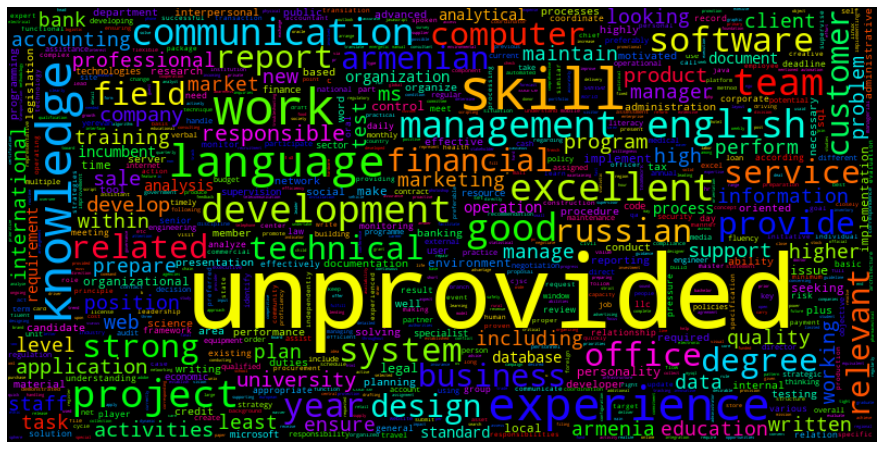

In [26]:
# Visualize the vocabulary list in Word Cloud

# Create a WordCloud object
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="black",
    max_words=10000,
    #     min_font_size=9,
    #     max_font_size=80,
    prefer_horizontal=0.95,
    repeat=False,
    collocations=False,  # whether to include collocations (bigrams) of two words
    colormap=sns.color_palette("hsv", as_cmap=True),
    random_state=SEED,
)

# Generate a word cloud
wordcloud.generate(",".join(full_vocab_list))

# Visualize the word cloud
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [27]:
vocab_list = list(set(full_vocab_list))
print(len(vocab_list))
vocab_list[:10]

17029


['novell',
 'ipsc',
 'prem',
 'anios',
 'giftcards',
 'motivationd',
 'deghabaza',
 'thereover',
 'tiered',
 'pmra']

In [24]:
# vocab_description_list = list(set(description_vocab_list))
# print(len(vocab_description_list))
# vocab_description_list[:10]

In [25]:
# vocab_requirement_list = list(set(requirement_vocab_list))
# print(len(vocab_requirement_list))
# vocab_requirement_list[:10]

In [26]:
# vocab_qualification_list = list(set(qualification_vocab_list))
# print(len(vocab_qualification_list))
# vocab_qualification_list[:10]

In [28]:
# load the pre-trained Stanford GloVe model in Word2Vec format (dimension 300)
pre_model = spacy.load('en_core_web_lg')

In [29]:
pre_model.pipe_names

['tok2vec', 'tagger', 'parser', 'ner', 'attribute_ruler', 'lemmatizer']

In [30]:
if 'parser' in pre_model.pipe_names:
    pre_model.remove_pipe('parser')
if 'ner' in pre_model.pipe_names:
    pre_model.remove_pipe('ner')
pre_model.pipe_names

['tok2vec', 'tagger', 'attribute_ruler', 'lemmatizer']

In [31]:
pre_model.max_length = 1500000

In [32]:
model_vocab = list(pre_model.vocab.strings)
type(model_vocab), len(model_vocab), model_vocab[:10]

(list,
 701570,
 ['\t', 'en', '\n', ' ', "'", "''", '"', "'Cause", 'because', "'cause"])

In [33]:
out_of_vocab = [token for token in vocab_list if token not in model_vocab]
print(len(out_of_vocab))
out_of_vocab[:10]

2414


['motivationd',
 'deghabaza',
 'thereover',
 'pmra',
 'adps',
 'orbeli',
 'kanaker',
 'mmdp',
 'paramaz',
 'hubsite']

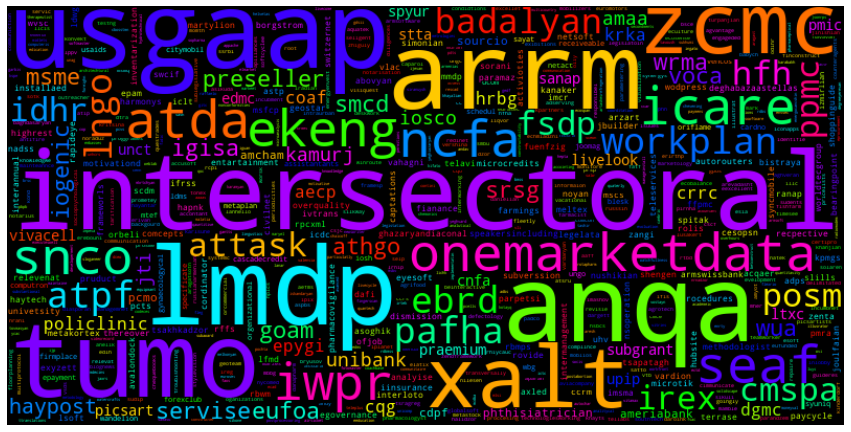

In [34]:
# Generate a word cloud
wordcloud.generate(",".join(out_of_vocab))

# Visualize the word cloud
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [34]:
# # Create list of tokens for skills of all columns
# skill_docs = skill_tokens_long_df[["job_id", "skill_id", "skill_tokens"]]
# skill_docs.shape
# # len(skill_docs), len(skill_docs[0]), skill_docs[0][:10]

(821600, 4, ['ameria', 'investment', 'consulting', 'company'])

In [81]:
# # # Create list of tokens for skills of job_description
# skill_description_docs = skill_tokens_db.loc[
#     skill_tokens_db["type"] == "job_description", ["job_id", "skill_id", "skill_tokens"]
# ]
# # # skill_description_docs = skill_tokens_df['job_description'].values.tolist()
# # len(skill_description_docs), len(skill_description_docs[0]), skill_description_docs[0][
# #     :10
# # ]
# skill_description_docs.shape

(203750, 3)

In [82]:
# # # Create list of tokens for skills of job_requirement
# skill_requirement_docs = skill_tokens_db.loc[
#     skill_tokens_db["type"] == "job_requirement", ["job_id", "skill_id", "skill_tokens"]
# ]
# # # skill_requirement_docs = skill_tokens_df['job_requirement'].values.tolist()
# # len(skill_requirement_docs), len(skill_requirement_docs[0]), skill_requirement_docs[0][
# #     :10
# # ]
# skill_requirement_docs.shape

(286379, 3)

In [83]:
# # # Create list of tokens for skills of job_qualification
# skill_qualification_docs = skill_tokens_db.loc[
#     skill_tokens_db["type"] == "job_qualification",
#     ["job_id", "skill_id", "skill_tokens"],
# ]
# # # skill_qualification_docs = skill_tokens_df['job_qualification'].values.tolist()
# # len(skill_qualification_docs), len(
# #     skill_qualification_docs[0]
# # ), skill_qualification_docs[0][:10]
# skill_qualification_docs.shape

(331471, 3)

In [38]:
# # Save cleaned job skill tokens in file
# skill_docs_outfile = OUTPUT_DIR + "skill_docs.csv"
# df = pd.DataFrame(
#     {
#         "skill_tokens": [],
#         "skill_description_tokens": [],
#         "skill_requirement_tokens": [],
#         "skill_qualification_tokens": [],
#     }
# )
# df["skill_tokens"] = skill_docs
# df["skill_description_tokens"] = skill_description_docs
# df["skill_requirement_tokens"] = skill_requirement_docs
# df["skill_qualification_tokens"] = skill_qualification_docs
# df.to_csv(skill_docs_outfile, index=False)

In [35]:
# Extract word embeddings from Spacy model
vector_list = []
word_list = []
for token in tqdm(vocab_list):
    if token in model_vocab:
        word_emb = pre_model(token)
        vector_list.append(word_emb.vector)
        word_list.append(token)
    else:
        continue

100%|███████████████████████████████████████████████████████████████████████████| 17029/17029 [01:21<00:00, 208.04it/s]


In [36]:
# Store word embeddings in Gensim keyed vectors
vector_size = len(vector_list[0])
print(vector_size)

kv = KeyedVectors(vector_size=vector_size)
kv.add_vectors(keys=word_list, weights=vector_list)

300


In [37]:
# Save Gensim keyed vectors to file
kv.save(OUTPUT_DIR + 'skill_word_vectors.kv')

In [38]:
# Normalize vectors
kv.fill_norms(force=True)

# Save normalized keyed vectors to file
kv.save(OUTPUT_DIR + 'skill_word_norm_vectors.kv')

In [39]:
def vectorize(doc_list, kv, vector_size):
    """Generate vectors for list of documents using a Word Embedding

    Args:
        doc_list: List of documents
        kv: GloVe's Word Embedding in Gensim Keyed Vectors format
        vector_size: dimension of 1 word embedding

    Returns:
        List of document vectors (mean of word vectors)
    """
    features = []

    process_doc_list = tqdm(doc_list)
    process_doc_list.set_description(desc="Creating document embeddings")

    for tokens in process_doc_list:
        zero_vector = np.zeros(vector_size)
        vectors = []
        for token in tokens:
            if kv.has_index_for(token):
                vectors.append(kv.get_vector(token))
            else:
                continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
            features.append(zero_vector)
    return features

In [40]:
# Create document embeddings for skills from job description
skill_description_embeddings = vectorize(
    skill_tokens_long_df["skill_description_tokens"].values.tolist(),
    kv,
    vector_size=vector_size,
)
print(np.asarray(skill_description_embeddings).shape)
np.asarray(skill_description_embeddings)[:1, :20]

Creating document embeddings: 100%|█████████████████████████████████████████| 361584/361584 [00:04<00:00, 75493.76it/s]


(361584, 300)


array([[-0.10179576,  0.36307752,  0.04279249, -0.48906499,  0.122118  ,
         0.17383575,  0.04791624, -0.2078    , -0.02696946,  1.65622497,
        -0.66441292, -0.11117225,  0.02172775, -0.0941    ,  0.21670249,
        -0.122729  , -0.03816376,  0.67914999,  0.15334275,  0.13572851]])

In [59]:
# Save document embeddings for skills from job description in numpy format file
skill_description_embeddings_outfile = OUTPUT_DIR + "skill_description_embeddings_long"
np.save(skill_description_embeddings_outfile, skill_description_embeddings)

In [41]:
# # Create document embeddings for skills from job requirement
skill_requirement_embeddings = vectorize(
    skill_tokens_long_df["skill_requirement_tokens"].values.tolist(),
    kv,
    vector_size=vector_size,
)
print(np.asarray(skill_requirement_embeddings).shape)
np.asarray(skill_requirement_embeddings)[:1, :20]

Creating document embeddings: 100%|█████████████████████████████████████████| 361584/361584 [00:06<00:00, 56358.26it/s]


(361584, 300)


array([[-2.42659181e-01,  3.58479977e-01,  1.83293983e-01,
         2.02031806e-01, -1.62464026e-02, -2.39464194e-01,
        -1.61102995e-01,  3.51598865e-04,  1.60761997e-01,
         2.28419995e+00, -3.96339983e-01,  4.67083976e-02,
         3.64970043e-02,  1.84987992e-01,  2.78451830e-01,
        -9.34085920e-02, -1.30370017e-02,  9.35373962e-01,
        -1.09166600e-01,  1.74501210e-01]])

In [60]:
# # Save document embeddings for skills from job requirement in numpy format file
skill_requirement_embeddings_outfile = OUTPUT_DIR + "skill_requirement_embeddings_long"
np.save(skill_requirement_embeddings_outfile, skill_requirement_embeddings)

In [42]:
# # Create document embeddings for skills from job qualification
skill_qualification_embeddings = vectorize(
    skill_tokens_long_df["skill_qualification_tokens"].values.tolist(),
    kv,
    vector_size=vector_size,
)
print(np.asarray(skill_qualification_embeddings).shape)
np.asarray(skill_qualification_embeddings)[:1, :20]

Creating document embeddings: 100%|█████████████████████████████████████████| 361584/361584 [00:08<00:00, 44214.28it/s]


(361584, 300)


array([[-0.23429051,  0.49108499, -0.05157325,  0.0261795 , -0.262824  ,
         0.26535299,  0.29045594, -0.35447749,  0.12077987,  2.06207514,
        -0.11535151,  0.1370685 , -0.11749176,  0.07580775, -0.12136976,
        -0.0708185 ,  0.050141  ,  1.66782486, -0.51416498, -0.00852025]])

In [61]:
# # Save document embeddings for skills from job qualification in numpy format file
skill_qualification_embeddings_outfile = OUTPUT_DIR + "skill_qualification_embeddings_long"
np.save(skill_qualification_embeddings_outfile, skill_qualification_embeddings)

In [43]:
# # # Create document embeddings for skills from all columns
# skill_long_embeddings = vectorize(
#     skill_docs, kv, vector_size=vector_size
# )
# print(len(skill_long_embeddings), len(skill_long_embeddings[0]))
# np.asarray(skill_long_embeddings)[:1, :20]

In [51]:
# # # Save document embeddings for skills from all columns in numpy format file
# skill_long_embeddings_outfile = OUTPUT_DIR + "skill_long_embeddings"
# np.save(skill_long_embeddings_outfile, skill_long_embeddings)

In [44]:
# job_ids = skill_tokens_db['job_id'].values.tolist()
# len(job_ids)

In [45]:
# skill_long_embeddings_with_ids = np.hstack(
#     (np.asarray(job_ids).reshape((len(job_ids), 1)), skill_long_embeddings)
# )
# skill_long_embeddings_with_ids.shape

In [46]:
# # # Save document embeddings for skills from all columns in numpy format file
# skill_long_embeddings_outfile = OUTPUT_DIR + "skill_long_embeddings_with_ids"
# np.save(skill_long_embeddings_outfile, skill_long_embeddings_with_ids)

In [47]:
# skill_long_embeddings = np.load(OUTPUT_DIR + "skill_long_embeddings_with_ids.npy")

In [48]:
# skill_long_embeddings.shape

In [49]:
# tmp_embeddings = np.zeros((20*18992, 901))
# tmp_embeddings.shape

In [ ]:
# for idx in tqdm(range(tmp_embeddings.shape[0])):
#     for row in range(skill_long_embeddings.shape[0]):
#         job_type = skill_tokens_db.loc[row, 'type']
#         if row < idx:
#             continue
#         elif job_type == 'job_description':
#             tmp_embeddings[idx, 1:301] = skill_long_embeddings[idx, 1:]
#         elif job_type == 'job_requirement':
#             tmp_embeddings[idx, 301:601] = skill_long_embeddings[idx, 1:]
#         else:
#             tmp_embeddings[idx, 601:] = skill_long_embeddings[idx, 1:]

In [ ]:
# skill_wide_embeddings = tmp_embeddings

In [51]:
# import gc
# gc.collect()

In [90]:
# skill_description_embeddings = np.load(OUTPUT_DIR + "skill_description_embeddings.npy")
# skill_description_embeddings_df = dd.from_array(skill_description_embeddings, chunksize=10000)
# skill_description_embeddings = None

In [91]:
# skill_requirement_embeddings = np.load(OUTPUT_DIR + "skill_requirement_embeddings.npy")
# skill_requirement_embeddings_df = dd.from_array(skill_requirement_embeddings, chunksize=10000)
# skill_requirement_embeddings = None

In [93]:
# skill_qualification_embeddings = np.load(OUTPUT_DIR + "skill_qualification_embeddings.npy")
# skill_qualification_embeddings_df = dd.from_array(skill_qualification_embeddings, chunksize=10000)
# skill_qualification_embeddings = None

In [ ]:
# skill_description_embeddings_df = pd.DataFrame(skill_description_embeddings)
# skill_requirement_embeddings_df = pd.DataFrame(skill_requirement_embeddings)
# skill_qualification_embeddings_df = pd.DataFrame(skill_qualification_embeddings)

In [52]:
# skill_description_embeddings_df.shape

In [95]:
# desc_cols = ['desc_' + str(i) for i in range(300)]
# require_cols = ['require_' + str(i) for i in range(300)]
# qual_cols = ['qual_' + str(i) for i in range(300)]

In [96]:
# skill_description_embeddings_df.columns = desc_cols
# skill_requirement_embeddings_df.columns = require_cols
# skill_qualification_embeddings_df.columns = qual_cols

In [97]:
# # Create document embeddings of skills by concatenating all embeddings
# # job_description & job_requirement & job_qualification
# skill_description_embeddings_with_ids = dd.merge(
#     skill_description_docs[['job_id']],
#     skill_description_embeddings_df
# )
# skill_requirement_embeddings_with_ids = dd.merge(
#     skill_requirement_docs[['job_id']],
#     skill_requirement_embeddings_df
# )
# skill_qualification_embeddings_with_ids = dd.merge(
#     skill_qualification_docs[['job_id']],
#     skill_qualification_embeddings_df
# )

In [98]:
# skill_description_embeddings_df = None
# skill_requirement_embeddings_df = None
# skill_qualification_embeddings_df = None

In [53]:
# skill_description_embeddings_with_ids.shape

In [54]:
# skill_description_embeddings_with_ids.columns

In [55]:
# skill_wide_embeddings = dd.merge(
#     skill_description_embeddings_with_ids,
#     skill_requirement_embeddings_with_ids,
#     on="job_id",
# )

In [56]:
# skill_wide_embeddings = dd.merge(
#     skill_wide_embeddings, skill_qualification_embeddings_with_ids, on="job_id"
# )

In [58]:
# skill_wide_embeddings.columns

In [62]:
# Concat embeddings of 3 columns
skill_wide_embeddings = np.hstack(
    (
        skill_description_embeddings,
        skill_requirement_embeddings,
        skill_qualification_embeddings,
    )
)

In [63]:
skill_wide_embeddings.shape

(361584, 900)

In [64]:
skill_wide_embeddings[:2, :20]

array([[-1.01795755e-01,  3.63077521e-01,  4.27924916e-02,
        -4.89064991e-01,  1.22117996e-01,  1.73835754e-01,
         4.79162447e-02, -2.07800001e-01, -2.69694552e-02,
         1.65622497e+00, -6.64412916e-01, -1.11172251e-01,
         2.17277482e-02, -9.40999985e-02,  2.16702491e-01,
        -1.22729003e-01, -3.81637551e-02,  6.79149985e-01,
         1.53342754e-01,  1.35728508e-01],
       [-2.57782340e-01,  1.78755566e-01, -1.44926667e-01,
         1.76406670e-02,  1.55499978e-02,  2.63644010e-01,
         1.62036672e-01, -1.80790007e-01,  2.90066693e-02,
         2.33259988e+00, -5.08567179e-03,  1.03660030e-02,
        -5.59599996e-02,  1.45353332e-01, -4.55506742e-02,
        -4.07866687e-01,  1.39703357e-03,  1.80436659e+00,
        -1.40613332e-01, -1.72526672e-01]])

In [66]:
# Save document embeddings of skill concatenating in numpy format file
# skill_wide_embeddings_outfile = OUTPUT_DIR + "skill_wide_embeddings.parquet"
# skill_wide_embeddings.to_parquet(skill_wide_embeddings_outfile, engine='pyarrow')
skill_wide_embeddings_outfile = OUTPUT_DIR + "skill_wide_embeddings.npz"
# np.save(skill_wide_embeddings_outfile, skill_wide_embeddings)
np.savez_compressed(
    skill_wide_embeddings_outfile, skill_wide_embeddings=skill_wide_embeddings
)